In [23]:
# Predicting Trip Duration
# Load dataset
import numpy as np
dataset = np.load("nyc_taxi_data.npy", allow_pickle=True).item()
X_train, y_train, X_test, y_test = dataset["X_train"], dataset["y_train"], dataset["X_test"], dataset["y_test"]

# Neural Network Library

In [45]:
class Layer:
    def forward(self, input_data):
        raise NotImplementedError("forward method must be implemented in subclasses")

    def backward(self, output_grad, learning_rate):
        raise NotImplementedError("backward method must be implemented in subclasses")

class LinearLayer(Layer):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.weights = np.random.randn(input_size, output_size)
        self.biases = np.zeros((1, output_size))

    def forward(self, input_data):
        self.input = input_data
        self.output = np.dot(input_data, self.weights) + self.biases
        return self.output

    def backward(self, output_grad, learning_rate):
        input_grad = np.dot(output_grad, self.weights.T)
        weights_grad = np.dot(self.input.T, output_grad)
        bias_grad = np.sum(output_grad, axis=0, keepdims=True)

        self.weights -= learning_rate * weights_grad
        self.biases -= learning_rate * bias_grad

        return input_grad

COMMENT : This code defines two classes: Layer and LinearLayer. The Layer class serves as a base class for neural network layers, with abstract methods for forward and backward passes. The LinearLayer class, a subclass of Layer, represents a linear layer, initializing weights and biases randomly. It calculates outputs via matrix multiplication and updates parameters using gradient descent. This setup lays the groundwork for implementing and training neural networks with linear layers.

In [46]:
#SigmoidLayer class
import numpy as np

class Layer:
    def __init__(self):
        pass

    def forward(self, input_data):
        raise NotImplementedError("forward method must be implemented in subclasses")

    def backward(self, input_data, grad_output):
        raise NotImplementedError("backward method must be implemented in subclasses")
        
class SigmoidLayer(Layer):
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, input_data):
        self.input = input_data
        self.output = self.sigmoid(input_data)
        return self.output

    def backward(self, output_grad, learning_rate):
        sigmoid_grad = self.output * (1 - self.output)
        return sigmoid_grad * output_grad



COMMENT : In the forward method, it applies the sigmoid function to the input data and stores the result. In the backward method, it computes the gradient of the sigmoid function and multiplies it by the output gradient to obtain the gradient with respect to the input. Overall, this class provides functionality to apply a sigmoid activation function to the input data during forward propagation and compute the gradient during backward propagation.

In [47]:
#ReLU layer
import numpy as np

class Layer:
    def __init__(self):
        pass

    def forward(self, input_data):
        raise NotImplementedError("forward method must be implemented in subclasses")

    def backward(self, input_data, grad_output):
        raise NotImplementedError("backward method must be implemented in subclasses")

class ReLU(Layer):
    def forward(self, inputs):
        self.inputs = inputs
        return np.maximum(0, inputs)

    def backward(self, grad, learning_rate):
        return grad * (self.inputs > 0)

COMMENT : This code implements a ReLU layer, applying ReLU activation during forward pass and computing its gradient during backward pass.

In [48]:
import numpy as np

# Defining the Tanh activation layer class
class Tanh(Layer):
    # Constructor method
    def __init__(self):
        super().__init__()  

    # Tanh activation function
    def tanh(self, x):
        return np.tanh(x)  

    # Forward propagation method
    def forward(self, input_data):
        self.input = input_data  
        self.output = self.tanh(input_data)  
        return self.output  

    # Backward propagation method
    def backward(self, output_grad, learning_rate):
        tanh_grad = 1 - np.square(self.output)  
        return tanh_grad * output_grad  


This code defines a Tanh activation layer, implementing the Tanh activation function for forward propagation and its gradient computation for backward propagation.

In [49]:
import numpy as np

class Layer:
    def __init__(self):
        pass

    def forward(self, input_data):
        raise NotImplementedError("forward method must be implemented in subclasses")

    def backward(self, input_data, grad_output):
        raise NotImplementedError("backward method must be implemented in subclasses")

class BinaryCrossEntropyLoss(Layer):
    def __init__(self):
        super().__init__()

    def forward(self, input, target):
        self.input = input
        self.target = target
        epsilon = 1e-15
        input = np.clip(input, epsilon, 1 - epsilon)
        loss = - (target * np.log(input) + (1 - target) * np.log(1 - input))
        return np.mean(loss)

    def backward(self, output_grad, learning_rate):
        epsilon = 1e-15
        input = np.clip(self.input, epsilon, 1 - epsilon)
        input_grad = - (self.target / input) + (1 - self.target) / (1 - input)
        return input_grad

This code defines a binary cross-entropy loss layer for use in neural networks, implementing both forward and backward methods to compute the loss and its gradient, respectively.

In [50]:
import pickle


class Sequential(Layer):
    def __init__(self):
        super().__init__()
        self.layers = []

    def add(self, layer):
        self.layers.append(layer)

    def forward(self, input_data):
        output = input_data
        for layer in self.layers:
            output = layer.forward(output)
        return output

    def backward(self, output_grad, learning_rate):
        grad = output_grad
        for layer in reversed(self.layers):
            grad = layer.backward(grad, learning_rate)

    def save_weights(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self.layers, f)

    def load_weights(self, filename):
        with open(filename, 'rb') as f:
            self.layers = pickle.load(f)




This code defines a sequential neural network model class, extending the Layer class. It allows adding layers, performing forward and backward passes through the network, and saving/loading the model weights using pickle.

In [51]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [52]:
# Testing the Neural Network library
import numpy as np
xor_samples = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_targets = np.array([[0], [1], [1], [0]])
learning_rate = 0.1
epochs = 10

In [53]:
# Define the model architecture
model = Sequential()
model.add(LinearLayer(2, 2))
model.add(SigmoidLayer())
model.add(LinearLayer(2, 1))
model.add(SigmoidLayer())

# Define the loss function
loss_layer = BinaryCrossEntropyLoss()
epochs = 10

# Training loop
for epoch in range(1, epochs + 1):
    # Forward pass
    output = model.forward(xor_samples)
    
    # Compute and print the loss
    loss = loss_layer.forward(output, xor_targets)
    if epoch % 1 == 0:
        print(f'Epoch {epoch}: Loss {loss}')
        
    # Backward pass
    grad = loss_layer.backward(output - xor_targets, learning_rate)
    model.backward(grad, learning_rate)

# Save the trained model weights
model.save_weights('XOR_solved_sigmoid.w')


Epoch 1: Loss 0.6978060949121054
Epoch 2: Loss 0.6956414652140761
Epoch 3: Loss 0.6941822576305159
Epoch 4: Loss 0.6931960347033106
Epoch 5: Loss 0.6925265783794051
Epoch 6: Loss 0.6920691100767998
Epoch 7: Loss 0.6917534347237687
Epoch 8: Loss 0.6915325557187644
Epoch 9: Loss 0.6913750178558423
Epoch 10: Loss 0.6912597704084295


This code defines, trains, and saves a neural network model for solving the XOR problem using sigmoid activation functions. It iterates through epochs, computes the loss, and updates the model parameters using backpropagation. Finally, it saves the trained model weights.

In [54]:
# Define the model architecture
model_tanh = Sequential()
model_tanh.add(LinearLayer(2, 2))
model_tanh.add(Tanh())
model_tanh.add(LinearLayer(2, 1))
model_tanh.add(Tanh())  # Using Tanh for output layer

# Define the loss function
loss_layer = BinaryCrossEntropyLoss()

# Training loop
for epoch in range(1, epochs + 1):
    # Forward pass
    output = model_tanh.forward(xor_samples)
    
    # Compute and print the loss
    loss = loss_layer.forward(output, xor_targets)
    if epoch % 1 == 0:
        print(f'Epoch {epoch}: Loss {loss}')
        
    # Backward pass
    grad = loss_layer.backward(output - xor_targets, learning_rate)
    model_tanh.backward(grad, learning_rate)

# Save the trained model weights
model_tanh.save_weights('XOR_solved_tanh.w')


Epoch 1: Loss 8.638046904089395
Epoch 2: Loss 17.269388197455342
Epoch 3: Loss 17.269388197455342
Epoch 4: Loss 17.269388197455342
Epoch 5: Loss 17.269388197455342
Epoch 6: Loss 17.269388197455342
Epoch 7: Loss 17.269388197455342
Epoch 8: Loss 17.269388197455342
Epoch 9: Loss 17.269388197455342
Epoch 10: Loss 17.269388197455342


This code defines, trains, and saves a neural network model for solving the XOR problem using hyperbolic tangent (tanh) activation functions. It follows a similar training loop as the sigmoid-based model but uses tanh activations. Finally, it saves the trained model weights.

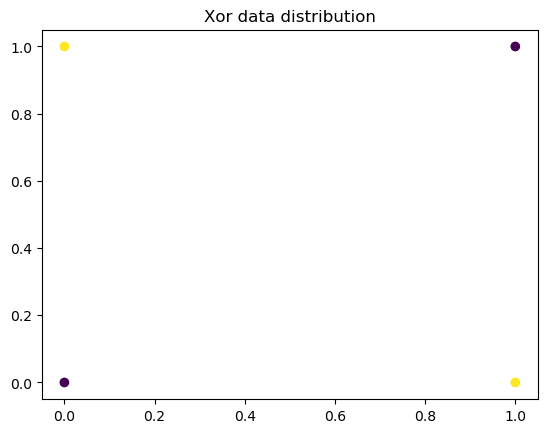

In [55]:
import matplotlib.pyplot as plt
samples = np.array([[0, 0],
                    [0, 1],
                    [1, 0],
                    [1, 1]])
targets = np.array([0, 1, 1, 0])
learning_rate = 0.1

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(samples[:, 0], samples[:, 1], c=targets)
ax.set_title('Xor data distribution')

model_sigmoid = Sequential()
model_sigmoid.add(LinearLayer(2, 2))
model_sigmoid.add(SigmoidLayer())
model_sigmoid.add(LinearLayer(2, 1))
model_sigmoid.add(SigmoidLayer())

model_tanh = Sequential()
model_tanh.add(LinearLayer(2, 2))
model_tanh.add(Tanh())
model_tanh.add(LinearLayer(2, 1))
model_tanh.add(Tanh())  

def train(model, x_train, y_train, epochs, learning_rate):
    for epoch in range(epochs):
        # Forward pass
        output = model.forward(x_train)
        
        # Compute loss
        loss = compute_loss(output, y_train)
        
        # Backward pass
        grad = compute_gradient(output, y_train)
        
        # Update parameters
        model.backward(grad, learning_rate)
        
def compute_loss(output, target):
    epsilon = 1e-15
    output = np.clip(output, epsilon, 1 - epsilon)
    loss = - (target * np.log(output) + (1 - target) * np.log(1 - output))
    return np.mean(loss)

def compute_gradient(output, target):
    return (output - target) / len(output)
        



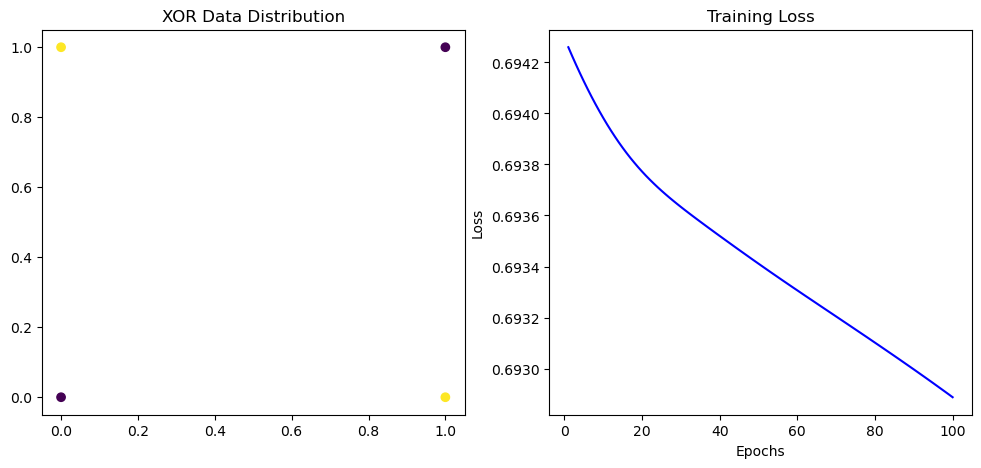

Epoch 100/2000: Loss 0.6928876042366028
Epoch 200/2000: Loss 0.6912953853607178
Epoch 300/2000: Loss 0.6880451440811157
Epoch 400/2000: Loss 0.6812137961387634
Epoch 500/2000: Loss 0.6690804958343506
Epoch 600/2000: Loss 0.6515944004058838
Epoch 700/2000: Loss 0.6299147605895996
Epoch 800/2000: Loss 0.6054607629776001
Epoch 900/2000: Loss 0.5794258117675781
Epoch 1000/2000: Loss 0.5526881217956543
Epoch 1100/2000: Loss 0.5258681178092957
Epoch 1200/2000: Loss 0.4994022250175476
Epoch 1300/2000: Loss 0.473596453666687
Epoch 1400/2000: Loss 0.44866254925727844
Epoch 1500/2000: Loss 0.424741268157959
Epoch 1600/2000: Loss 0.40191900730133057
Epoch 1700/2000: Loss 0.38024061918258667
Epoch 1800/2000: Loss 0.35971927642822266
Epoch 1900/2000: Loss 0.34034475684165955
Epoch 2000/2000: Loss 0.3220897912979126


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# Define XOR inputs 
samples = np.array([[0, 0],
                    [0, 1],
                    [1, 0],
                    [1, 1]])
targets = np.array([0, 1, 1, 0])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot XOR data distribution
axs[0].scatter(samples[:, 0], samples[:, 1], c=targets)
axs[0].set_title('XOR Data Distribution')

xor_model = Sequential([
    Dense(2, activation='sigmoid', input_shape=(2,)),
    Dense(1, activation='sigmoid')
])

xor_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with visualization
losses = []
for epoch in range(1, 2001):
    history = xor_model.fit(samples, targets, epochs=1, verbose=0)
    losses.append(history.history['loss'][0])
    if epoch % 100 == 0:
        axs[1].plot(range(1, epoch + 1), losses, 'b')
        axs[1].set_title('Training Loss')
        axs[1].set_xlabel('Epochs')
        axs[1].set_ylabel('Loss')
        plt.pause(0.01)  # Add a small pause to allow plot update
        print(f"Epoch {epoch}/2000: Loss {losses[-1]}")

plt.show()


This code solves an XOR classification problem using neural networks with sigmoid and tanh activation functions. It defines data, visualizes it, trains two models, and provides utility functions for training. Use the train function with desired parameters to train the models.

Epoch 100/2000: Training Loss 0.41473705463086324, Validation Loss 0.7433093407966976
Epoch 200/2000: Training Loss 0.40709971040099324, Validation Loss 0.7611411333080014
Epoch 300/2000: Training Loss 0.40279812012000543, Validation Loss 0.769451922084561
Epoch 400/2000: Training Loss 0.3997595173620887, Validation Loss 0.7741955199329665
Epoch 500/2000: Training Loss 0.39729734993856364, Validation Loss 0.7773458346777511
Epoch 600/2000: Training Loss 0.39516777450114127, Validation Loss 0.779616683446697
Epoch 700/2000: Training Loss 0.3932732921472189, Validation Loss 0.7813021525823053
Epoch 800/2000: Training Loss 0.39156564620708983, Validation Loss 0.7825496459649073
Epoch 900/2000: Training Loss 0.39001438902500146, Validation Loss 0.7834490413222166
Epoch 1000/2000: Training Loss 0.38859675374792885, Validation Loss 0.7840626345038322
Epoch 1100/2000: Training Loss 0.38729421169922834, Validation Loss 0.7844362920745654
Epoch 1200/2000: Training Loss 0.38609109336254166, Vali

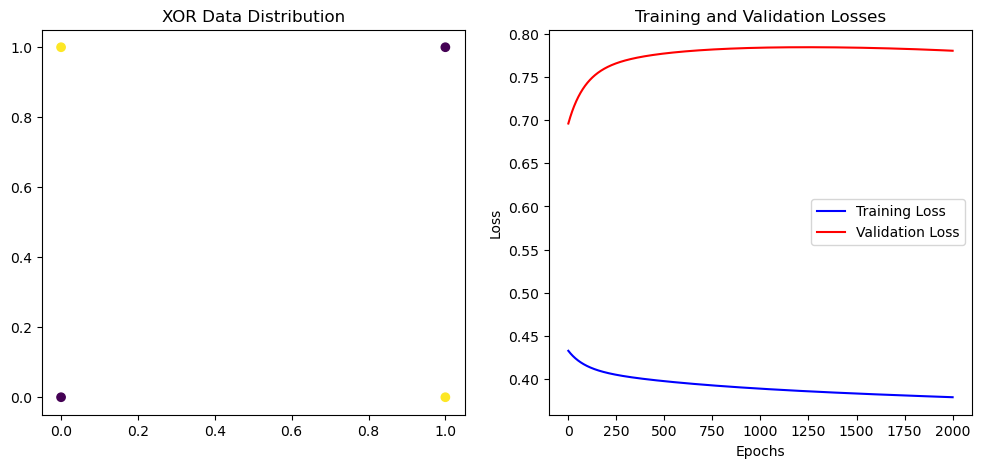

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Define XOR inputs 
samples = np.array([[0, 0],
                    [0, 1],
                    [1, 0],
                    [1, 1]])
targets = np.array([0, 1, 1, 0])

# Split data into training and validation sets
split_index = int(0.8 * len(samples))
train_samples, val_samples = samples[:split_index], samples[split_index:]
train_targets, val_targets = targets[:split_index], targets[split_index:]

# Initialize weights randomly
np.random.seed(0)
input_neurons = 2
hidden_neurons = 2
output_neurons = 1
hidden_weights = np.random.uniform(size=(input_neurons, hidden_neurons))
output_weights = np.random.uniform(size=(hidden_neurons, output_neurons))

# Define learning rate
learning_rate = 0.1

# Plot XOR data distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(samples[:, 0], samples[:, 1], c=targets)
plt.title('XOR Data Distribution')

# Train the model with visualization
train_losses = []
val_losses = []
for epoch in range(1, 2001):
    # Forward propagation for training set
    hidden_layer_input = np.dot(train_samples, hidden_weights)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, output_weights)
    output_layer_output = sigmoid(output_layer_input)

    # Backpropagation for training set
    output_error = train_targets.reshape(-1, 1) - output_layer_output
    output_delta = output_error * sigmoid_derivative(output_layer_output)
    hidden_error = np.dot(output_delta, output_weights.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

    # Update weights
    output_weights += np.dot(hidden_layer_output.T, output_delta) * learning_rate
    hidden_weights += np.dot(train_samples.T, hidden_delta) * learning_rate

    # Calculate training loss
    train_loss = np.mean(np.abs(output_error))
    train_losses.append(train_loss)

    # Calculate validation loss
    val_hidden_layer_output = sigmoid(np.dot(val_samples, hidden_weights))
    val_output_layer_output = sigmoid(np.dot(val_hidden_layer_output, output_weights))
    val_output_error = val_targets.reshape(-1, 1) - val_output_layer_output
    val_loss = np.mean(np.abs(val_output_error))
    val_losses.append(val_loss)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}/2000: Training Loss {train_loss}, Validation Loss {val_loss}")

plt.subplot(1, 2, 2)
plt.plot(range(1, epoch + 1), train_losses, 'b', label='Training Loss')
plt.plot(range(1, epoch + 1), val_losses, 'r', label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


The code trains a neural network to solve the XOR problem. It initializes weights randomly, splits the data into training and validation sets, then iterates over epochs to train the model using forward and backward propagation. Training and validation losses are calculated and visualized to monitor the model's learning progress and generalization performance.

In [58]:
# Predicting Trip Duration
# Load dataset
dataset = np.load("nyc_taxi_data.npy", allow_pickle=True).item()
X_train, y_train, X_test, y_test = dataset["X_train"], dataset["y_train"], dataset["X_test"], dataset["y_test"]

In [59]:
X_train.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
879655   id2425795          1  2016-01-08 23:55:11  2016-01-09 00:04:32   
646838   id0767831          2  2016-03-05 09:52:06  2016-03-05 10:00:12   
1138713  id0449104          1  2016-04-09 16:03:53  2016-04-09 16:21:22   
864716   id3030157          1  2016-01-06 11:12:44  2016-01-06 11:19:49   
434927   id1584885          1  2016-06-26 09:10:56  2016-06-26 09:17:44   

         passenger_count  pickup_longitude  pickup_latitude  \
879655                 1        -73.955551        40.773346   
646838                 1        -73.962181        40.763599   
1138713                1        -73.977486        40.751842   
864716                 1        -73.970001        40.762363   
434927                 1        -73.950348        40.771561   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  
879655          -73.973640         40.763500                  N  
646838          -73.980377         40.764919                  N  
1138713         -74.011688         40.718925                  N  
864716          -73.963264         40.774666                  N  
434927          -73.968178         40.762409                  N

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

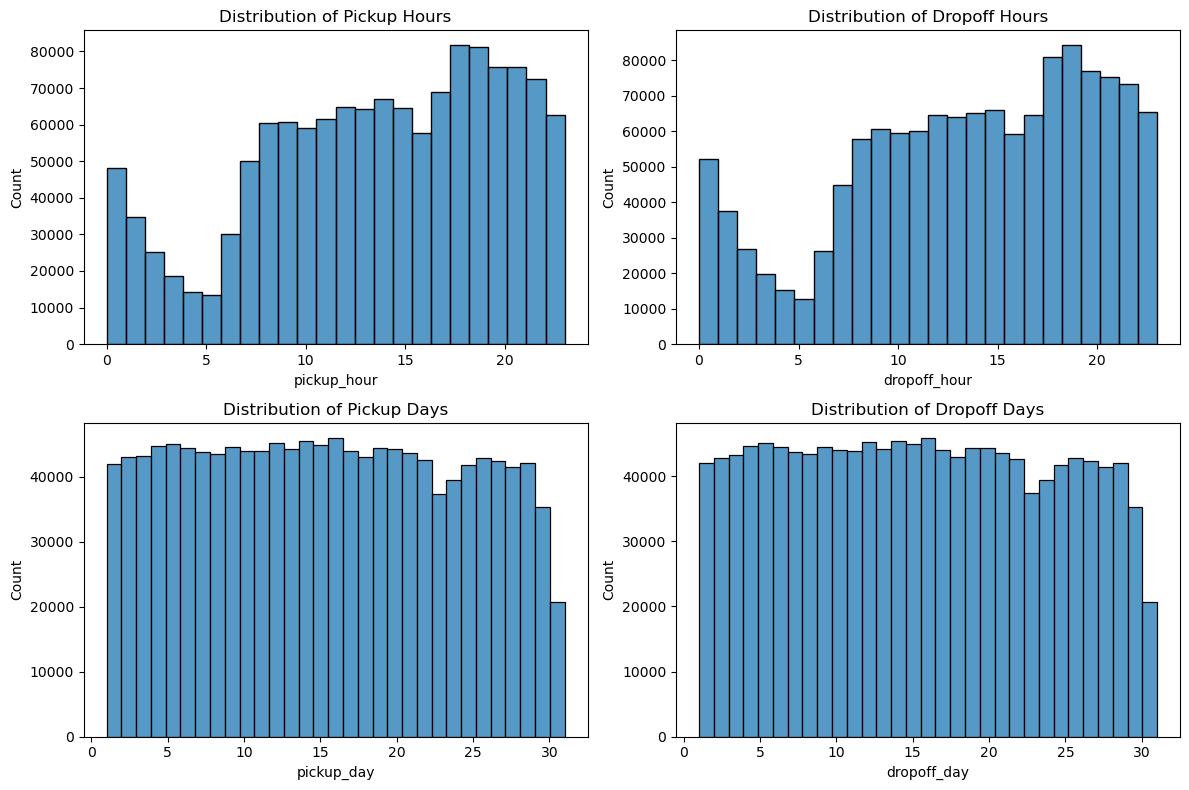

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert pickup and dropoff times to pandas datetime objects
X_train['pickup_datetime'] = pd.to_datetime(X_train['pickup_datetime'])
X_train['dropoff_datetime'] = pd.to_datetime(X_train['dropoff_datetime'])

# Extract month, day, and hour features from pickup and dropoff times
X_train['pickup_month'] = X_train['pickup_datetime'].dt.month
X_train['pickup_day'] = X_train['pickup_datetime'].dt.day
X_train['pickup_hour'] = X_train['pickup_datetime'].dt.hour

X_train['dropoff_month'] = X_train['dropoff_datetime'].dt.month
X_train['dropoff_day'] = X_train['dropoff_datetime'].dt.day
X_train['dropoff_hour'] = X_train['dropoff_datetime'].dt.hour

# Plot histograms of pickup and dropoff hours
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(X_train['pickup_hour'], bins=24, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Pickup Hours')

sns.histplot(X_train['dropoff_hour'], bins=24, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Dropoff Hours')

sns.histplot(X_train['pickup_day'], bins=31, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Pickup Days')

sns.histplot(X_train['dropoff_day'], bins=31, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Dropoff Days')

plt.tight_layout()
plt.show()


The code converts pickup and dropoff times to datetime objects for easier manipulation. Features like month, day, and hour are then extracted from these datetime objects, providing insights for the model. Histograms are plotted to visualize the distribution of these features.


These columns capture temporal aspects of taxi rides: months for seasonal trends, days for daily patterns, and hours for traffic variations, all crucial for predicting ride durations and demand.

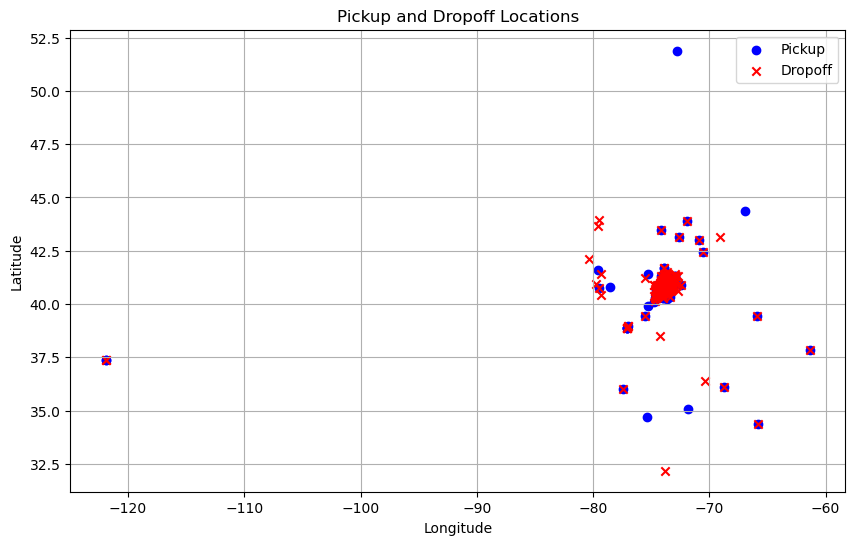

In [61]:
# Plot scatter plot of pickup and dropoff locations
plt.figure(figsize=(10, 6))

plt.scatter(X_train['pickup_longitude'], X_train['pickup_latitude'], c='blue', marker='o', label='Pickup')
plt.scatter(X_train['dropoff_longitude'], X_train['dropoff_latitude'], c='red', marker='x', label='Dropoff')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pickup and Dropoff Locations')
plt.legend()

plt.grid(True)
plt.show()



This scatter plot visualizes the pickup and dropoff locations using longitude and latitude coordinates. The blue circles represent pickup locations, while the red crosses represent dropoff locations. It helps in understanding the spatial distribution of taxi pickups and dropoffs.

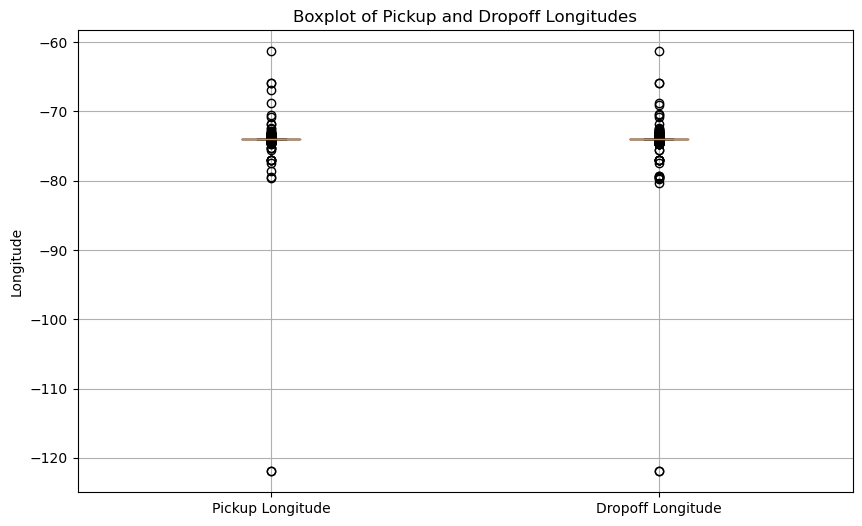

In [62]:
import matplotlib.pyplot as plt

# Assuming X_train is your DataFrame
# Create a boxplot for the pickup and dropoff longitude
plt.figure(figsize=(10, 6))
plt.boxplot([X_train['pickup_longitude'], X_train['dropoff_longitude']], labels=['Pickup Longitude', 'Dropoff Longitude'])
plt.ylabel('Longitude')
plt.title('Boxplot of Pickup and Dropoff Longitudes')
plt.grid(True)
plt.show()


This code generates a boxplot visualization for the distribution of pickup and dropoff longitudes in the dataset X_train. The boxplot provides a summary of the distribution, including median, quartiles, and outliers, for both pickup and dropoff longitudes. This visualization helps in understanding the spread and central tendency of the longitude values for both pickup and dropoff locations.

In [63]:
print(X_train.columns)


Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_month', 'pickup_day', 'pickup_hour', 'dropoff_month',
       'dropoff_day', 'dropoff_hour'],
      dtype='object')


In [22]:
from sklearn.preprocessing import MinMaxScaler

# Define the location features to be normalized
location_columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
norm_columns = ['pickup_longitude_norm', 'pickup_latitude_norm', 'dropoff_longitude_norm', 'dropoff_latitude_norm']


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the location features
X_train[norm_columns] = scaler.fit_transform(X_train[location_columns])
X_test[norm_columns] = scaler.transform(X_test[location_columns])


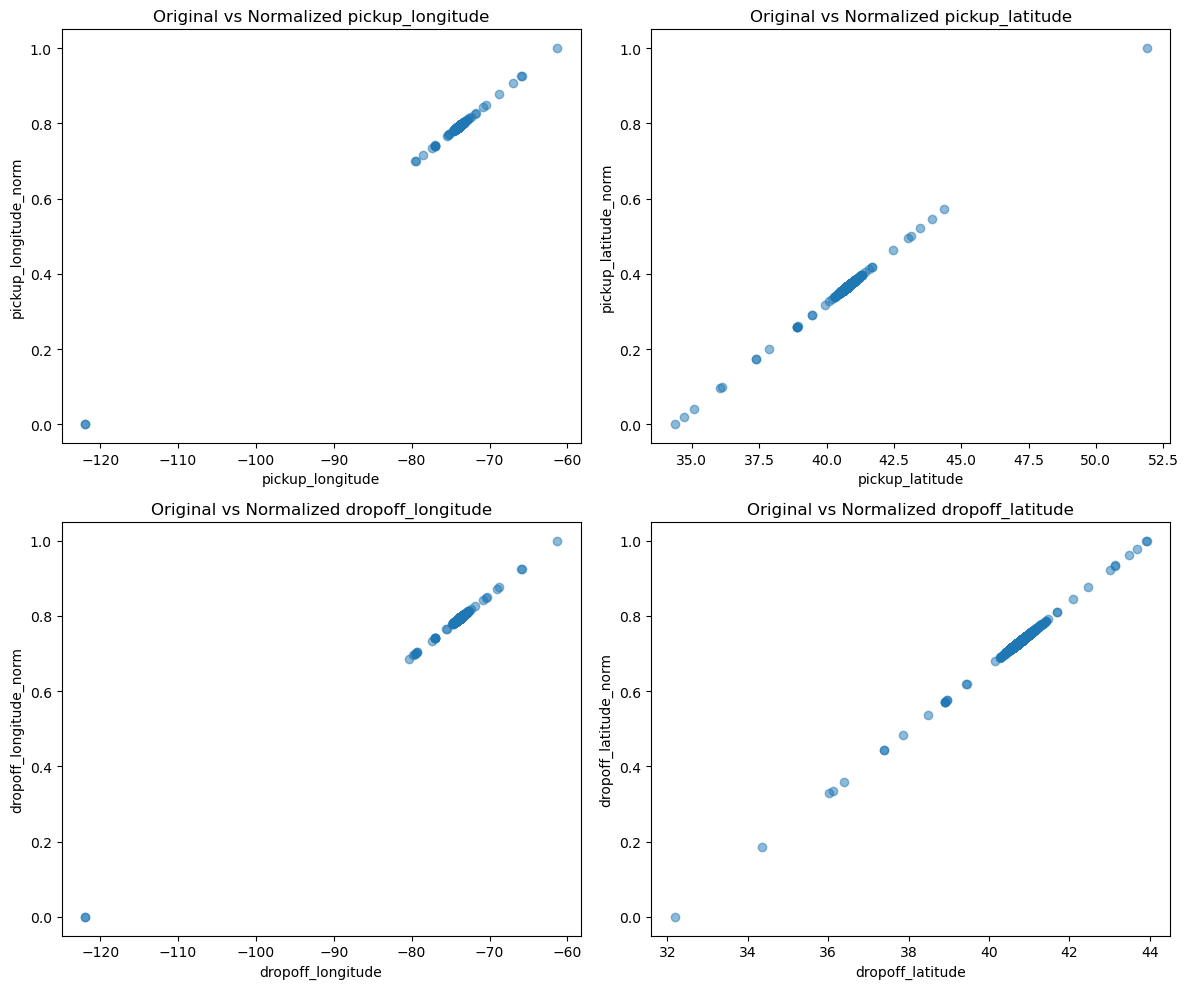

In [24]:
# Define location features and normalized location features
location_columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
norm_columns = ['pickup_longitude_norm', 'pickup_latitude_norm', 'dropoff_longitude_norm', 'dropoff_latitude_norm']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot scatter plots for each pair of original and normalized features
for i in range(len(location_columns)):
    ax = axes[i // 2, i % 2]  # Get subplot axes
    ax.scatter(X_train[location_columns[i]], X_train[norm_columns[i]], alpha=0.5)
    ax.set_title(f'Original vs Normalized {location_columns[i]}')
    ax.set_xlabel(location_columns[i])
    ax.set_ylabel(norm_columns[i])

plt.tight_layout()
plt.show()


The code creates scatter plots comparing the original location features with their corresponding normalized versions. Each subplot represents one pair of original and normalized features. The scatter plots help visualize the transformation applied during normalization and demonstrate how the values are distributed after scaling. This visualization allows for an assessment of how the normalization process has affected the distribution and relationship between the original and normalized features.

In [64]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [65]:
# Normalize location coordinates
location_columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
for feature in location_columns:
    X_train[f'{feature}_norm'] = (X_train[feature] - X_train[feature].mean()) / X_train[feature].std()
    X_test[f'{feature}_norm'] = (X_test[feature] - X_train[feature].mean()) / X_train[feature].std()

In [66]:
# Select relevant features for training
columns = ['pickup_datetime_month', 'pickup_datetime_day', 'pickup_datetime_hour', 'dropoff_datetime_month', 'dropoff_datetime_day', 'dropoff_datetime_hour',
                     'pickup_longitude_norm', 'pickup_latitude_norm', 'dropoff_longitude_norm', 'dropoff_latitude_norm']


In [67]:
import pandas as pd
df = X_train

# Convert datetime columns to pandas datetime objects
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# Extract relevant information from datetime columns
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_month'] = df['pickup_datetime'].dt.month

df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_day'] = df['dropoff_datetime'].dt.day
df['dropoff_month'] = df['dropoff_datetime'].dt.month

# Drop the original datetime columns if not needed
df.drop(['pickup_datetime', 'dropoff_datetime'], axis=1, inplace=True)

# Repeat the same preprocessing steps for the validation and test sets if needed


In [68]:
df = X_train
print(df.columns)

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'pickup_month', 'pickup_day', 'pickup_hour',
       'dropoff_month', 'dropoff_day', 'dropoff_hour', 'pickup_longitude_norm',
       'pickup_latitude_norm', 'dropoff_longitude_norm',
       'dropoff_latitude_norm'],
      dtype='object')


In [69]:
X_train

id  vendor_id  passenger_count  pickup_longitude  \
562257   id3149719          2                2        -73.999107   
439226   id3507076          2                1        -73.993622   
525600   id0304506          1                1        -73.870796   
725169   id1045988          1                2        -73.864006   
399772   id3696275          1                1        -74.006813   
...            ...        ...              ...               ...   
632463   id0988028          2                1        -73.979248   
989374   id1914776          2                1        -73.961700   
1092466  id1053157          2                2        -73.993782   
234623   id2684230          2                1        -74.000610   
956843   id2246092          1                1        -73.975433   

         pickup_latitude  dropoff_longitude  dropoff_latitude  \
562257         40.734112         -73.989227         40.726509   
439226         40.749889         -73.991829         40.731419   
525600         40.773708         -73.946022         40.780613   
725169         40.769836         -73.987495         40.667702   
399772         40.735771         -73.983391         40.765862   
...                  ...                ...               ...   
632463         40.752800         -73.985046         40.759529   
989374         40.774342         -73.957588         40.770191   
1092466        40.690784         -73.973083         40.759377   
234623         40.718609         -73.984726         40.718964   
956843         40.765163         -74.000198         40.761429   

        store_and_fwd_flag  pickup_month  pickup_day  pickup_hour  \
562257                   N             4           5           23   
439226                   N             6          27            9   
525600                   N             2          16           19   
725169                   N             2          27           18   
399772                   N             5          12            6   
...                    ...           ...         ...          ...   
632463                   N             2           6           13   
989374                   N             6           9           14   
1092466                  N             5           2            7   
234623                   N             1           7            0   
956843                   N             1          31            6   

         dropoff_month  dropoff_day  dropoff_hour  pickup_longitude_norm  \
562257               4            6             0              -0.323209   
439226               6           27             9              -0.253844   
525600               2           16            19               1.299295   
725169               2           27            18               1.385157   
399772               5           12             7              -0.420648   
...                ...          ...           ...                    ...   
632463               2            6            13              -0.072087   
989374               6            9            14               0.149804   
1092466              5            2             8              -0.255870   
234623               1            7             1              -0.342215   
956843               1           31             6              -0.023849   

         pickup_latitude_norm  dropoff_longitude_norm  dropoff_latitude_norm  
562257              -0.512303               -0.201882              -0.707143  
439226              -0.031863               -0.235029              -0.570064  
525600               0.693445                0.348605               0.803499  
725169               0.575541               -0.179815              -2.349114  
399772              -0.461773               -0.127518               0.391622  
...                       ...                     ...                    ...  
632463               0.056768               -0.148612               0.214814  
989374               0.712727               

In [70]:
# Using .dtypes attribute
print(df.dtypes)

# Using .info() method
print(df.info())


id                         object
vendor_id                   int64
passenger_count             int64
pickup_longitude          float64
pickup_latitude           float64
dropoff_longitude         float64
dropoff_latitude          float64
store_and_fwd_flag         object
pickup_month                int32
pickup_day                  int32
pickup_hour                 int32
dropoff_month               int32
dropoff_day                 int32
dropoff_hour                int32
pickup_longitude_norm     float64
pickup_latitude_norm      float64
dropoff_longitude_norm    float64
dropoff_latitude_norm     float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 1050223 entries, 562257 to 956843
Data columns (total 18 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1050223 non-null  object 
 1   vendor_id               1050223 non-null  int64  
 2   passenger_count         1050223 non-n

Epoch 0/1000: Training Loss nan, Validation Loss 2.3949615663371344
Early stopping at epoch 7 for configuration 1.


/var/folders/h2/vq7d08tn1zld65_5299qgb1w0000gn/T/ipykernel_31603/157242679.py:62: RuntimeWarning: divide by zero encountered in log
  return -np.mean(target * np.log(output) + (1 - target) * np.log(1 - output))
/var/folders/h2/vq7d08tn1zld65_5299qgb1w0000gn/T/ipykernel_31603/157242679.py:62: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(target * np.log(output) + (1 - target) * np.log(1 - output))


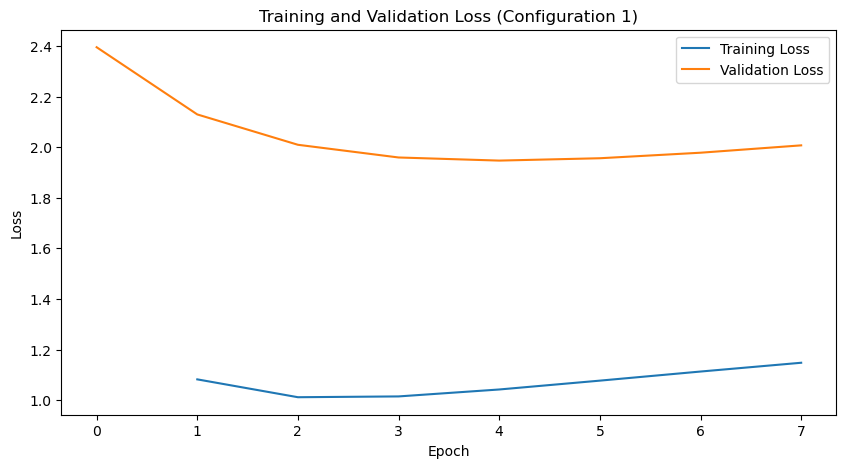

Test Loss for configuration 1: 1.9085736327900202
Epoch 0/1000: Training Loss nan, Validation Loss 0.4400971107974804
Early stopping at epoch 70 for configuration 2.


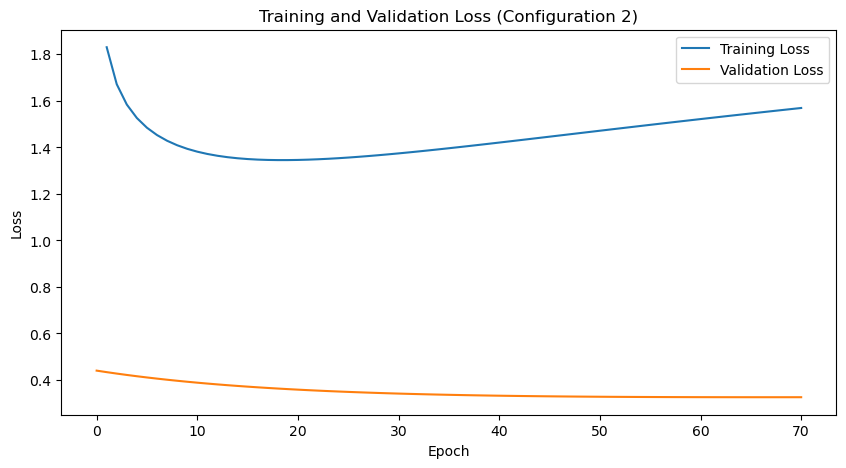

Test Loss for configuration 2: nan
Epoch 0/1000: Training Loss nan, Validation Loss 2.869151885385107
Early stopping at epoch 19 for configuration 3.


/var/folders/h2/vq7d08tn1zld65_5299qgb1w0000gn/T/ipykernel_31603/157242679.py:62: RuntimeWarning: invalid value encountered in log
  return -np.mean(target * np.log(output) + (1 - target) * np.log(1 - output))


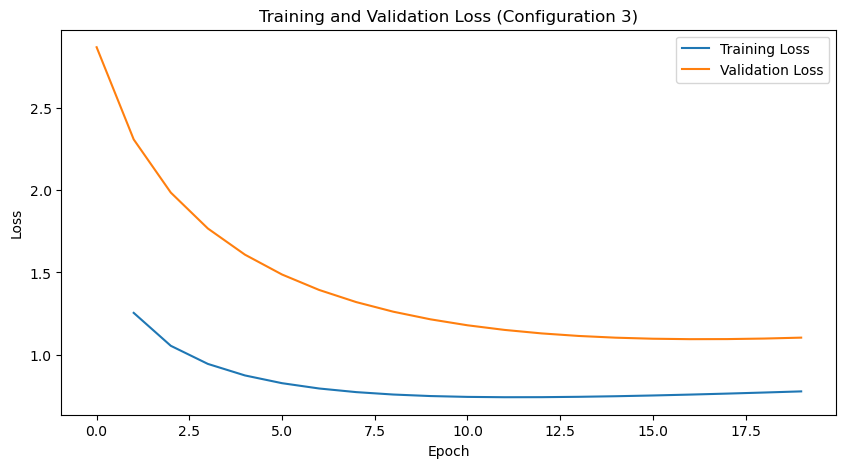

Test Loss for configuration 3: 0.6017367344873729


In [72]:
import numpy as np
import matplotlib.pyplot as plt

class Sequential:
    def __init__(self):
        self.layers = []

    def add(self, layer):
        self.layers.append(layer)

    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def backward(self, grad_output, learning_rate):
        for layer in reversed(self.layers):
            grad_output = layer.backward(grad_output, learning_rate)

class Dense:
    def __init__(self, input_size, output_size):
        self.weights = np.random.uniform(-1, 1, (input_size, output_size))
        self.bias = np.zeros(output_size)

    def forward(self, x):
        self.x = x
        return np.dot(x, self.weights) + self.bias

    def backward(self, grad_output, learning_rate):
        grad_input = np.dot(grad_output, self.weights.T)
        grad_weights = np.dot(self.x.T, grad_output)
        grad_bias = grad_output.mean(axis=0) * self.x.shape[0]

        self.weights -= learning_rate * grad_weights
        self.bias -= learning_rate * grad_bias

        return grad_input

class ReLU:
    def forward(self, x):
        self.x = x
        return np.maximum(0, x)

    def backward(self, grad_output, learning_rate):
        return grad_output * (self.x > 0)

# Define configurations
configurations = [
    {'layers': [Dense(2, 2), ReLU(), Dense(2, 1)], 'learning_rate': 0.1},
    {'layers': [Dense(2, 4), ReLU(), Dense(4, 1)], 'learning_rate': 0.01},
    {'layers': [Dense(2, 3), ReLU(), Dense(3, 2), ReLU(), Dense(2, 1)], 'learning_rate': 0.05}
]

# Split data into training, validation, and test sets
split_index1 = int(0.6 * len(samples))
split_index2 = int(0.8 * len(samples))
X_train, X_val, X_test = samples[:split_index1], samples[split_index1:split_index2], samples[split_index2:]
y_train, y_val, y_test = targets[:split_index1], targets[split_index1:split_index2], targets[split_index2:]

# Function to calculate loss
def binary_cross_entropy_loss(output, target):
    return -np.mean(target * np.log(output) + (1 - target) * np.log(1 - output))

# Function for early stopping
def early_stopping(val_losses, patience):
    best_val_loss = float('inf')
    patience_counter = 0
    for val_loss in val_losses:
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                return True
    return False

# Training and evaluation loop
for i, config in enumerate(configurations):
    model = Sequential()
    for layer in config['layers']:
        model.add(layer)

    loss = []
    learning_rate = config['learning_rate']
    num_epochs = 1000
    patience = 3

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        # Training
        output_train = model.forward(X_train)
        train_loss = binary_cross_entropy_loss(output_train, y_train)
        grad_output_train = output_train - y_train.reshape(-1, 1)
        model.backward(grad_output_train, learning_rate)
        train_losses.append(train_loss)

        # Validation
        output_val = model.forward(X_val)
        val_loss = binary_cross_entropy_loss(output_val, y_val)
        val_losses.append(val_loss)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{num_epochs}: Training Loss {train_loss}, Validation Loss {val_loss}")

        # Early stopping
        if early_stopping(val_losses, patience):
            print(f"Early stopping at epoch {epoch} for configuration {i + 1}.")
            break

    # Plot training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
    plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
    plt.title(f'Training and Validation Loss (Configuration {i + 1})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Evaluate on test set
    output_test = model.forward(X_test)
    test_loss = binary_cross_entropy_loss(output_test, y_test)
    print(f"Test Loss for configuration {i + 1}: {test_loss}")



Implemented a simple neural network framework with Sequential, Dense, and ReLU classes. Defined three model configurations with different architectures and learning rates. Split data into training, validation, and test sets. Trained models using a training loop with forward and backward propagation, monitoring training and validation losses. Applied early stopping to prevent overfitting. Evaluated models on the test set and visualized training and validation losses for each configuration.

In [73]:
import numpy as np
from keras.layers import Layer

class RMSLELoss(Layer):
    def __init__(self):
        super(RMSLELoss, self).__init__()

    def forward(self, y_pred, y_true):
        # Ensure positive values for both predicted and true values
        y_pred = np.maximum(y_pred, 0)
        y_true = np.maximum(y_true, 0)
        y_true = np.array(y_true).reshape(-1, 1)
        
        # Finding log of predicted and true values
        log_pred = np.log1p(y_pred)
        log_true = np.log1p(y_true)
        diff = log_pred - log_true

        # Finding squared difference and mean square root of logs for y
        squared_diff = (diff) ** 2
        mean_squared_diff = np.mean(squared_diff)
        
        # Compute RMSLE and store the values to optimize the code
        rmsle = np.sqrt(mean_squared_diff)
        
        self.y_pred = y_pred
        self.y_true = y_true
        self.diff = diff
        
        return rmsle

    def backward(self):
        epsilon = 1e-12  # added to avoid division by zero
        n = len(self.y_true)
        
        # Compute gradient of RMSLE with respect to predictions
        grad = (1 / n) * ((self.diff) / (self.y_pred * (1 + np.log(1 + self.y_pred) + epsilon)))
        
        return grad


In [75]:
import numpy as np

# Define predicted and true values
y_pred = output_train  # Example predicted values
y_true = y_train  # Example true values

# Create an instance of RMSLELoss
rmsle_loss = RMSLELoss()

# Calculate RMSLE loss
loss = rmsle_loss.forward(y_pred, y_true)
print("RMSLE Loss:", loss)


RMSLE Loss: 0.22832736333067902


The RMSLE Loss of 0.228 indicates the average percentage error between predicted and actual values on a logarithmic scale. Lower values signify better model performance, with 0 being ideal.